# Parkway Project

### Load Data

#### Import packages

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings(action='once')

#### Read data from file

In [9]:
#filePath = '.\data\ParkwaySampleDataForProject_05.xlsx'
#filePath = '.\data\ParkwaySampleDataForProject_06.xlsx'
filePath = '.\data\ParkwaySampleDataForProject_09_withTOSP3.xlsx'
df = pd.read_excel(filePath)
display(df.shape)

(381211, 83)

### Exploratory Data Analysis

#### Explore data

In [10]:
info = []
for col in df.columns:
    non_null  = len(df) - np.sum(pd.isna(df[col]))
    num_unique = df[col].nunique()
    col_type = str(df[col].dtype)

    info.append([col, non_null, num_unique, col_type])

features_info = pd.DataFrame(info, columns = ['colName','non-null values', 'unique', 'dtype'])

display(features_info)
#features_info.to_csv('Info_List.csv')

colName  non-null values  unique           dtype
0           INSTITUTION           381211       4          object
1           CASE_NUMBER           381211  381210           int64
2        TOTAL_PAID_AMT           381211  326907         float64
3          PAYER_CODE_1           381211     482          object
4          PAYER_NAME_1           381211     425          object
5      PAYER_1_PAID_AMT           381211  308341         float64
6          PAYER_CODE_2           149319     378          object
7          PAYER_NAME_2           149319     329          object
8      PAYER_2_PAID_AMT           381211  117053         float64
9          PAYER_CODE_3            53206     230          object
10         PAYER_NAME_3            53206     201          object
11     PAYER_3_PAID_AMT           381211   42878         float64
12         PAYER_CODE_4             2373      89          object
13         PAYER_NAME_4             2373      78          object
14     PAYER_4_PAID_AMT           381211    2198         float64
15         PAYER_CODE_5               52      21          object
16         PAYER_NAME_5               52      18          object
17     PAYER_5_PAID_AMT           381211      41         float64
18            CASE_TYPE           381211       1          object
19             BED_TYPE           381211      10          object
20        REFERRAL_TYPE           381207      50          object
21   TREATMENT_CATEGORY           381211      60          object
22        ADMISSION_DTE           381211    1095  datetime64[ns]
23       ADMISSION_TYPE           381211       8          object
24        DISCHARGE_DTE           381211    1128  datetime64[ns]
25       DISCHARGE_TYPE           381211       9           int64
26  DISCHARGE_TYPE_DESC           381211       9          object
27             LOS_DAYS           381211     147           int64
28          DOCTOR_CODE           381210    1247          object
29          DOCTOR_NAME           381211    1247          object
30       SPECIALTY_CODE           381174      36         float64
31       SPECIALTY_DESC           381174      36          object
32        SPECIALTY_GRP           372892       5         float64
33           TOSP_COUNT           381211      12           int64
34          TOSP_STRING           267027   17489          object
35           TOSP_CODE1           267027    2114          object
36           TOSP_CODE2            85650    1571          object
37           TOSP_CODE3            12950     965          object
38           TOSP_CODE4             3265     491          object
39           TOSP_DESC1           381211    1807          object
40           TOSP_DESC2            85650    1358          object
41           TOSP_DESC3            12950     852          object
42           TOSP_DESC4             3265     442          object
43          NATIONALITY           381211     163          object
44            RESID_CTY           381206     132          object
45     RESID_POSTALCODE           381199   41533          object
46                  DOB           381211   31946  datetime64[ns]
47        NONRESID_FLAG           381211       2          object
48          PATIENT_SID           381211  266574           int64
49       PATIENT_NUMBER           381211  266574           int64
50               GENDER           381211       3          object
51        DECEASED_FLAG           381211       2          object
52       MARITAL_STATUS           363545       8          object
53             RELIGION           172706      17          object
54             LANGUAGE           381211       1          object
55             VIP_FLAG           381211       2          object
56                 RACE           380825       8          object
57             DRG_CODE           372891     682          object
58             DRG_DESC           381211     681          object
59        PAYER_CODE1_V           381211     482          object
60        PAYER_NAME1_V           381211     425   

In [11]:
# drop columns
col_drop = ['PAYER_NAME_1', 'PAYER_NAME_2', 'PAYER_NAME_3', 'PAYER_NAME_4', 'PAYER_NAME_5', 'DISCHARGE_TYPE_DESC', 'DOCTOR_NAME', 'SPECIALTY_DESC',
            'TOSP_STRING', 'TOSP_DESC1', 'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4', 'DRG_DESC', 'PAYER_CODE1_V', 'PAYER_NAME1_V', 'PAYER_CODE2_V',
            'PAYER_NAME2_V', 'PAYER_CODE3_V', 'PAYER_NAME3_V', 'PAYER_CODE4_V', 'PAYER_NAME4_V', 'PACKAGE_DESC', 'PACKAGE_DESC1', 'PACKAGE_DESC2',
            'ICDCODE_STRING']
df1 =  df.drop(col_drop, axis=1)

# convert dates
col_dt = df1.select_dtypes(include=np.datetime64).columns
for col in col_dt:
    df1[col+'_year'] = df1[col].dt.year
    df1[col+'_month'] = df1[col].dt.month
    df1[col+'_day'] = df1[col].dt.day
df1 =  df1.drop(col_dt, axis=1)

# convert objects to factors
col_obj = df1.select_dtypes(include=np.object).columns
for col in col_obj:
    df1[col] = pd.factorize(df1[col])[0] +1

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381211 entries, 0 to 381210
Data columns (total 63 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INSTITUTION          381211 non-null  int64  
 1   CASE_NUMBER          381211 non-null  int64  
 2   TOTAL_PAID_AMT       381211 non-null  float64
 3   PAYER_CODE_1         381211 non-null  int64  
 4   PAYER_1_PAID_AMT     381211 non-null  float64
 5   PAYER_CODE_2         381211 non-null  int64  
 6   PAYER_2_PAID_AMT     381211 non-null  float64
 7   PAYER_CODE_3         381211 non-null  int64  
 8   PAYER_3_PAID_AMT     381211 non-null  float64
 9   PAYER_CODE_4         381211 non-null  int64  
 10  PAYER_4_PAID_AMT     381211 non-null  float64
 11  PAYER_CODE_5         381211 non-null  int64  
 12  PAYER_5_PAID_AMT     381211 non-null  float64
 13  CASE_TYPE            381211 non-null  int64  
 14  BED_TYPE             381211 non-null  int64  
 15  REFERRAL_TYPE    

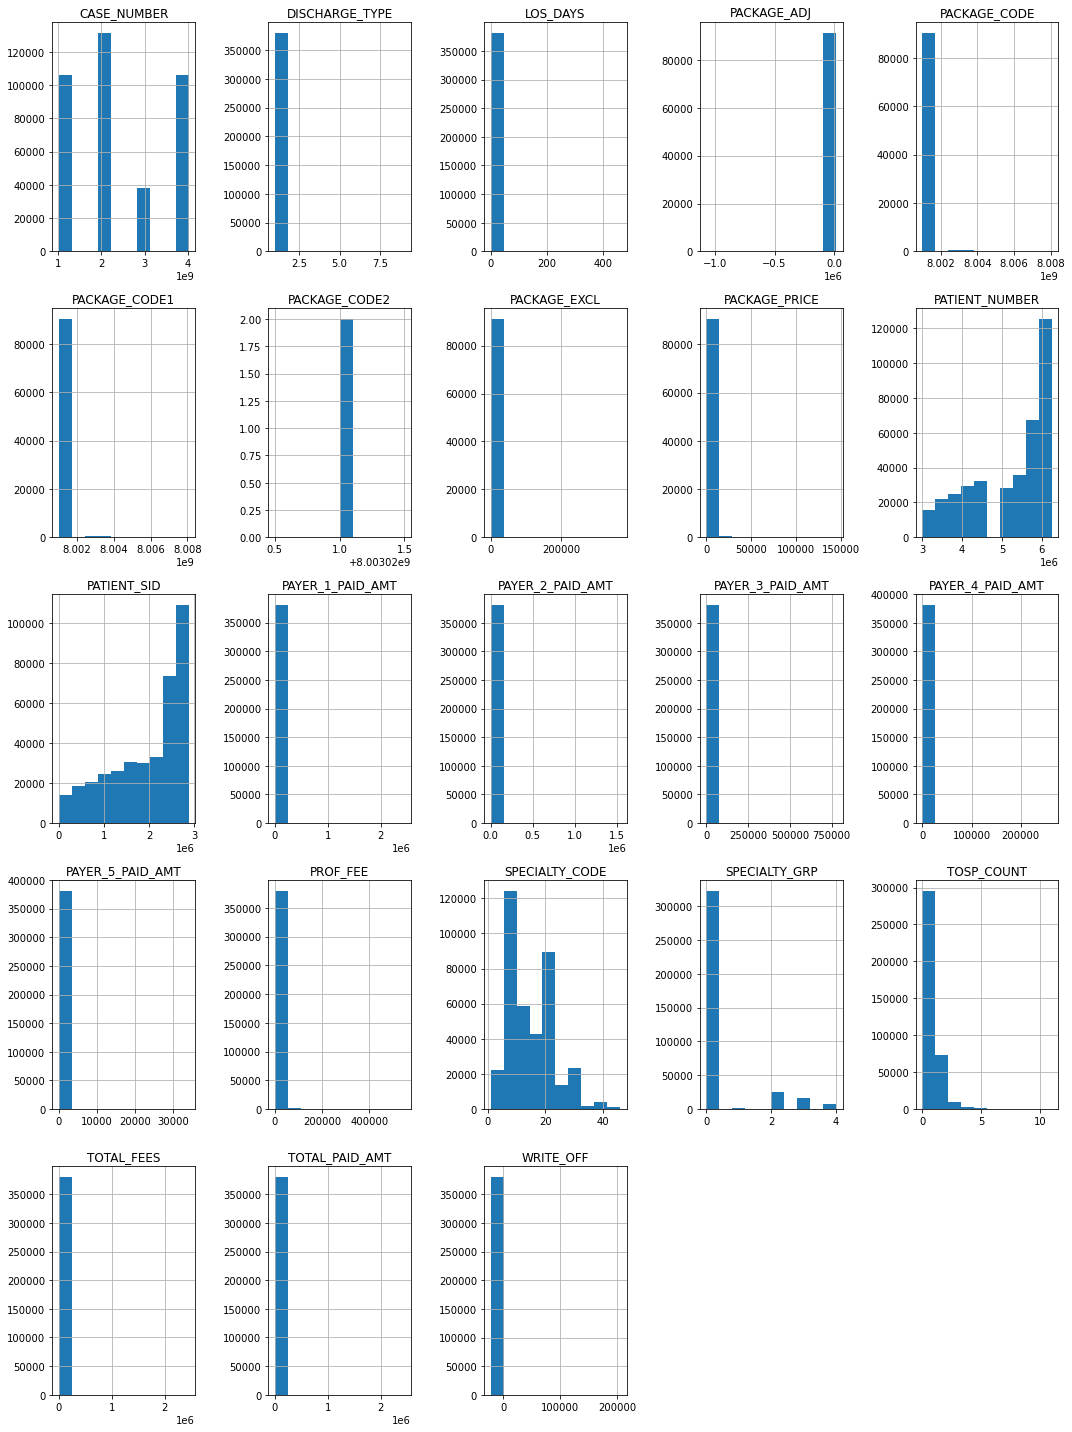

In [12]:
df.hist(figsize=(15,20), layout=(-1,5))
plt.tight_layout()
plt.show()

In [13]:
#writeoff, totalfee groupby country
for col in df.select_dtypes(include=np.object).columns:
    print(col)
    display(df[col].value_counts())

INSTITUTION


MEH    131063
GHL    106229
PNH    105781
PEH     38138
Name: INSTITUTION, dtype: int64

PAYER_CODE_1


              200128
0002008111     35329
0002000000     32943
0002008170     25117
0002008113     23374
0002008114     13505
0002008112      9683
0002008783      5633
0002100073      3006
0002000166      2465
0002100972      2071
0002101171      1828
0002100009      1470
0002101218      1446
0002007089       971
0002000088       860
I8303000         749
0002007915       739
0002101512       734
0002100330       700
0002001581       645
0002006870       585
0002000086       565
0002101217       491
I8388E01         471
0002008784       469
0002000323       444
I8388608         439
0002100300       424
0002001924       413
I8388E02         398
0002002275       379
0002100837       374
0002000502       365
0002002755       346
0002101017       344
0002008937       318
0002101008       303
0002002808       299
0002101430       284
0002002557       266
0002006808       256
0002100634       244
0002002227       242
0002003096       242
0002101332       238
I8388E06         237
0002001371   

PAYER_NAME_1


Self-Paid                              200128
AIA - HEALTHSHIELD GOLD                 35329
MEDISAVE                                32943
PRUDENTIAL - PRUSHIELD                  25117
GREAT EASTERN LIFE ASSURANCE CO LTD     23542
NTUC INCOME - INCOMESHIELD              13505
AVIVA LTD - MYSHIELD                     9683
CIGNA INTERNATIONAL                      6145
CHANGI GENERAL HOSPITAL                  3006
BUPA INSURANCE SERVICES LTD              2465
AETNA INSURANCE COMPANY LIMITED          2170
FWD SINGAPORE PTE LTD                    1937
AXA INSURANCE PTE LTD(SHIELD PLANS)      1828
AIA SINGAPORE PTE LTD                    1770
ALLIANZ WORLDWIDE CARE LTD                971
AXA INSURANCE PTE LTD (HEALTH             860
NIPPON MEDICAL CARE PTE LTD               749
HENNER-GMC UG32                           739
CIGNA GLOBAL HEALTH BENEFITS (CGHB)       734
ADEPT HEALTH PTE LTD                      700
AVIVA LTD                                 645
INTERNATIONAL SOS PTE LTD         

PAYER_CODE_2


0002000000    86042
0002008114    12386
0002008111     6483
0002100009     5143
0002001581     4035
0002008113     3487
0002008170     3449
0002000001     3330
0002008112     3071
0002101217     2545
0002008783     1603
0002001477     1446
0002003096     1416
0002000088      999
0002000166      986
0002100634      956
0002100330      852
0002101218      763
0002100972      576
0002008784      543
0002101430      523
0002006254      451
0002000086      387
0002101189      385
0002002755      384
0002002557      357
0002007089      304
0002007915      252
0002003108      246
0002101512      243
0002101008      231
0002008937      227
0002101070      222
0002101171      213
0002100044      185
0002101017      163
0002101159      161
I8388608        155
0002001966      155
0002101650      132
0002101295      132
0002100300      118
0002100655      116
0002008692      115
0002002532      108
0002101677      105
0002008560      101
0002008259       90
0002006870       88
0002007505       87


PAYER_NAME_2


MEDISAVE                               86042
NTUC INCOME - INCOMESHIELD             12386
AIA - HEALTHSHIELD GOLD                 6483
AIA SINGAPORE PTE LTD                   5689
GREAT EASTERN LIFE ASSURANCE CO LTD     4940
AVIVA LTD                               4035
PRUDENTIAL - PRUSHIELD                  3449
MEDISHIELD                              3330
FWD SINGAPORE PTE LTD                   3308
AVIVA LTD - MYSHIELD                    3071
CIGNA INTERNATIONAL                     2190
TOKIO MARINE LIFE INSURANCE             1416
AXA INSURANCE PTE LTD (HEALTH            999
BUPA INSURANCE SERVICES LTD              986
AXA INSURANCE PTE LTD (EMPLOYEES         956
ADEPT HEALTH PTE LTD                     852
AETNA INSURANCE COMPANY LIMITED          625
PRUDENTIAL ASSURANCE CO SINGAPORE        451
IPA SINGAPORE PTE LTD                    387
PT. AA INTERNATIONAL INDONESIA           385
CIGNA LIFE INSURANCE COMPANY             384
ULINK ASSIST PTE LTD                     357
ALLIANZ WO

PAYER_CODE_3


0002000001    11656
0002008114    11215
0002008111     9280
0002008113     4783
0002008170     4200
0002008112     3926
0002100009     1988
0002101217     1535
0002001581      859
0002100634      376
0002003096      364
0002101218      354
0002001477      347
0002101171      318
0002000088      198
0002100330      180
0002101650      127
0002101430      121
I8388608        113
0002008783      103
0002006254       92
0002008259       82
0002100972       62
0002002755       48
0002001966       44
0002008784       39
0002000166       37
0002101512       35
0002000086       32
0002005088       32
0002002532       26
0002007915       25
0002100144       22
0002006893       20
0002101231       19
0002006808       17
0002008857       16
0002008692       16
0002101295       15
0002008669       15
0002007505       15
0002100044       13
0002101017       12
0002101008       12
0002101518       12
0002100036       11
0002101159       11
0002101677       10
0002002336       10
0002007089       10


PAYER_NAME_3


MEDISHIELD                             11656
NTUC INCOME - INCOMESHIELD             11215
AIA - HEALTHSHIELD GOLD                 9280
GREAT EASTERN LIFE ASSURANCE CO LTD     5134
PRUDENTIAL - PRUSHIELD                  4200
AVIVA LTD - MYSHIELD                    3926
AIA SINGAPORE PTE LTD                   2109
FWD SINGAPORE PTE LTD                   1889
AVIVA LTD                                859
AXA INSURANCE PTE LTD (EMPLOYEES         376
TOKIO MARINE LIFE INSURANCE              364
AXA INSURANCE PTE LTD(SHIELD PLANS)      318
AXA INSURANCE PTE LTD (HEALTH            198
ADEPT HEALTH PTE LTD                     180
CIGNA INTERNATIONAL                      142
AIA SINGAPORE PTE LTD CORP SOLUTION      127
PARKWAY SHENTON PTE LTD                  121
PRUDENTIAL ASSURANCE CO SINGAPORE         92
RAFFLES HEALTH INSURANCE PTE LTD          82
AETNA INSURANCE COMPANY LIMITED           65
CIGNA LIFE INSURANCE COMPANY              48
PANASIA SURGERY PTE LTD                   45
NTUC INCOM

PAYER_CODE_4


0002100009    532
0002008114    276
0002101217    231
0002008111    147
0002001581    124
0002101218    106
0002008170    102
0002100634     99
0002008113     98
0002008112     84
0002100330     63
0002001477     57
0002003096     55
0002008259     45
I8388608       44
0002000088     35
0002101430     32
0002101650     32
0002006254     30
0002101171     16
0002005088      9
0002006893      9
0002000166      8
0002100972      8
0002001966      7
0002101512      6
0002100655      6
0002002532      5
0002007686      5
0002002755      5
0002008857      4
0002101359      4
0002101231      4
0002008692      4
0002008784      3
0002101534      3
0002008025      3
0002101677      3
0002008783      3
0002008711      3
0002000188      2
0002100044      2
0002001371      2
I8388609        2
0002000086      2
0002002557      2
0002003108      2
0002100036      2
0002101159      2
0002100042      2
0002007505      2
0002100025      2
I8168012        2
0002008713      2
0002100323      1
0002100054

PAYER_NAME_4


AIA SINGAPORE PTE LTD                  567
FWD SINGAPORE PTE LTD                  337
NTUC INCOME - INCOMESHIELD             276
GREAT EASTERN LIFE ASSURANCE CO LTD    156
AIA - HEALTHSHIELD GOLD                147
AVIVA LTD                              124
PRUDENTIAL - PRUSHIELD                 102
AXA INSURANCE PTE LTD (EMPLOYEES        99
AVIVA LTD - MYSHIELD                    84
ADEPT HEALTH PTE LTD                    63
TOKIO MARINE LIFE INSURANCE             55
PARKWAY SHENTON PTE LTD                 47
RAFFLES HEALTH INSURANCE PTE LTD        45
AXA INSURANCE PTE LTD (HEALTH           35
AIA SINGAPORE PTE LTD CORP SOLUTION     32
PRUDENTIAL ASSURANCE CO SINGAPORE       30
AXA INSURANCE PTE LTD(SHIELD PLANS)     16
AVIVA LIMITED                            9
QBE INSURANCE (SINGAPORE) PTE LTD        9
BUPA INSURANCE SERVICES LTD              8
AETNA INSURANCE COMPANY LIMITED          8
NTUC INCOME INSURANCE CO-OP  LTD         7
CIGNA INTERNATIONAL                      7
GEOBLUE    

PAYER_CODE_5


0002100634    9
0002101650    6
0002008113    4
0002008111    4
0002003096    4
0002008170    3
0002100009    3
0002101217    3
0002101218    2
I8388609      2
0002008259    2
0002101024    1
0002008114    1
I8388608      1
0002002755    1
0002100330    1
0002101171    1
0002101430    1
0002008857    1
0002008537    1
0002008756    1
Name: PAYER_CODE_5, dtype: int64

PAYER_NAME_5


AXA INSURANCE PTE LTD (EMPLOYEES       9
AIA SINGAPORE PTE LTD CORP SOLUTION    6
FWD SINGAPORE PTE LTD                  5
AIA SINGAPORE PTE LTD                  4
TOKIO MARINE LIFE INSURANCE            4
AIA - HEALTHSHIELD GOLD                4
GREAT EASTERN LIFE ASSURANCE CO LTD    4
PRUDENTIAL - PRUSHIELD                 3
PARKWAY SHENTON PTE LTD                3
RAFFLES HEALTH INSURANCE PTE LTD       2
MSIG INSURANCE (SINGAPORE) PTE LTD     1
CIGNA - PROVIDER CLAIMS                1
HEALTHWAY MEDICAL GROUP PTE LTD        1
EURO-CENTER (THAILAND) CO. LTD         1
CIGNA LIFE INSURANCE COMPANY           1
ADEPT HEALTH PTE LTD                   1
NTUC INCOME - INCOMESHIELD             1
AXA INSURANCE PTE LTD(SHIELD PLANS)    1
Name: PAYER_NAME_5, dtype: int64

CASE_TYPE


INPATIENT    381211
Name: CASE_TYPE, dtype: int64

BED_TYPE


DC           151729
SGL          106630
2BD           48068
4BD           31535
CLASS A       15988
NURSP         11743
ABOVE SGL      6724
ICU/HDU        3175
MOH            3049
NICU           2570
Name: BED_TYPE, dtype: int64

REFERRAL_TYPE


MC    312706
AE     40590
HR     14765
OH      3546
OC      3096
AB      2665
CC      1706
ZS       420
MR       406
SM       387
MS       199
MA       184
ZI       110
ZC        69
MW        51
CM        43
M         37
OR        34
M2        34
AM        23
ZN        20
PU        17
OO        13
M1        13
HS        10
AH         8
UL         8
SP         7
PS         5
ES         4
CA         3
RI         3
PC         2
CU         2
ZP         2
ZG         2
PH         2
VS         2
EV         2
ZA         1
CD         1
DC         1
WC         1
C1         1
ZO         1
RC         1
CN         1
CW         1
OE         1
BK         1
Name: REFERRAL_TYPE, dtype: int64

TREATMENT_CATEGORY


SGL       100076
ENDO       73118
2BD        47237
4BD        31534
DC         31409
DW2B       16863
A1         15988
DC1        14987
NURSP      11688
SGLN        5032
YAG         3822
ARGON       3117
CGH         3009
DW1B        2634
HDU         2084
EXE         1984
DC2B        1485
LASIK       1484
VIP         1415
NI1         1261
ICU         1091
DC4B        1028
SUP         1001
EYE          973
DLX          918
SGLS         856
NI2B         741
2BDW14       690
GK           598
VIP2         391
NI2A         351
IOD          296
TUSGL        295
EDLX         232
NI3          217
HBC          215
DC1B         211
ORC          188
TU2BD        141
VIP3         115
DAF           66
NUR1          52
DAL           52
SI35          41
CGHC          40
SGLW14        34
RYL           32
DEM           28
TANGLN        22
RYLL          17
RYL1          15
GLEN          10
RYLLL          7
RYL2           6
NAPIER         3
NASSIM         3
WBABY          3
VIP1           2
RYL3          

ADMISSION_TYPE


IN    99228
MA    95811
DS    88653
PD    60613
PI    30684
MB     6009
EA      202
EB       11
Name: ADMISSION_TYPE, dtype: int64

DISCHARGE_TYPE_DESC


DISCHARGED         379338
DEATH                1237
TECH DISCHARGED       379
TX TO GOVT HOSP       133
TX TO PRIV HOSP        56
OTHERS                 32
TX TO REST HOSP        21
ABSCONDED              14
BRAIN DEAD              1
Name: DISCHARGE_TYPE_DESC, dtype: int64

DOCTOR_CODE


03365J    3768
05572G    3186
05214J    3181
05178J    3084
03900D    3001
          ... 
07424A       1
09755A       1
06658I       1
01830I       1
10043I       1
Name: DOCTOR_CODE, Length: 1247, dtype: int64

DOCTOR_NAME


DR CHENG JUN                           3768
DR LUI HOCK FOONG                      3186
DR DEDE SELAMAT SUTEDJA                3181
DR LEE HUNG MING                       3084
DR GWEE KOK ANN                        3001
                                       ... 
DR KOH BOON YONG ADRIAN                   1
DR CHUTATAPE THOR TIMOTHY ANUNTAPON       1
DR ONG CHENG KANG                         1
DR LIM YUIN WEN                           1
DR THENG THIAM SENG COLIN                 1
Name: DOCTOR_NAME, Length: 1247, dtype: int64

SPECIALTY_DESC


GENERAL SURGERY                 64043
GASTROENTEROLOGY                58375
OBSTETRICS & GYNAECOLOGY        44297
ORTHOPAEDIC SURGERY             34722
PAEDIATRIC MEDICINE             33995
OPHTHALMOLOGY                   33164
CARDIOLOGY                      18974
OTORHINOLARYNGOLOGY             16712
UROLOGY                         16675
MEDICAL ONCOLOGY                 9506
RESPIRATORY MEDICINE             8339
NEUROSURGERY                     6836
INFECTIOUS DISEASE               4599
RENAL MEDICINE                   4378
NEUROLOGY                        3885
HAND SURGERY                     3171
PLASTIC SURGERY                  3068
HAEMATOLOGY                      2662
CARDIOTHORACIC SURGERY           2083
ANAESTHESIOLOGY                  1857
RHEUMATOLOGY                     1575
ENDOCRINOLOGY                    1282
INTERNAL MEDICINE                1191
PAEDIATRIC SURGERY               1177
DERMATOLOGY                      1105
PSYCHIATRY                        940
ORAL & MAXIL

TOSP_STRING


SF702C ; SF701I                      19946
SF701I                               16279
SF704C ; SF701I                      11503
SF702C                                7264
SP836U                                7187
                                     ...  
SK713N ; SA716S                          1
SL706L ; SL809E ; SL817E                 1
SI709U ; SI703C ; SI715U ; SI803C        1
SI700L ; SI819U                          1
SF837A ; SM701T ; SM714N ; SM724N        1
Name: TOSP_STRING, Length: 17489, dtype: int64

TOSP_CODE1


SF702C    31008
SF704C    21525
SF701I    21156
SP836U     7277
SL808L     7026
          ...  
SL814E        1
SH806P        1
SK709N        1
SM801E        1
SK702C        1
Name: TOSP_CODE1, Length: 2114, dtype: int64

TOSP_CODE2


SF701I    34923
SF700I     6212
SF702C     4400
SF704C     2931
SM714N     1912
          ...  
SB816J        1
SK701F        1
SB731F        1
SI700F        1
SB812H        1
Name: TOSP_CODE2, Length: 1571, dtype: int64

TOSP_CODE3


SM724N    900
SM714N    838
SF834A    776
SF702C    469
SF701I    386
         ... 
SB700B      1
SK756S      1
SB807K      1
SF711B      1
SL807L      1
Name: TOSP_CODE3, Length: 965, dtype: int64

TOSP_CODE4


SM724N    414
SM714N    291
SK749S    140
SM713N    113
SI843U     86
SM705T     76
SM715N     72
SK744S     61
SI725U     48
SF701I     45
SK711S     40
SF834A     39
SM707S     37
SM700N     36
SF702C     36
SF838A     35
SF836A     33
SG716B     32
SK759E     30
SK703S     29
SD720V     29
SM711S     26
SM715S     25
SM716L     25
SI842U     24
SA827B     24
SK733N     23
SF849A     22
SG727K     21
SB832F     20
SG713B     19
SI812V     18
SM704S     18
SF823A     17
SF815L     16
SG718B     15
SM832E     15
SG800U     14
SD811V     14
SF704C     13
SM701T     13
SI709U     13
SI715U     13
SM708E     13
SI807U     13
SK702S     12
SF801G     12
SI801U     12
SD718A     12
SM711L     11
SI803O     11
SI810C     11
SI802O     10
SB819J     10
SA893S     10
SD811H     10
SM714S     10
SF831A      9
SK745S      9
SA890S      9
SF814A      9
SI807F      9
SF808A      9
SB825B      9
SI835V      9
SF841A      8
SI806O      8
SF708A      8
SF700I      8
SI816U      8
SF833A      8
SM712N

TOSP_DESC1


This is not a Surgical.                     114184
Colon, Colonoscopy (diagnostic), fibreop     54495
Intestine/Stomach, Upper GI endoscopy wi     26564
Lens, Cataract, Extraction with Intra-oc     14899
Uterus, Pregnancy, Vaginal Delivery (wit     10232
                                             ...  
Brow, Browlift, Endoscopic, Bilateral            1
Ear, Microtia, Repositioning of Lobule           1
Heart, Various Lesions, Cardiac Biopsy           1
HYSTEROSCOPY, DIAGNOSTIC(WITH GENERAL            1
Hand, Free toe pulp transfer                     1
Name: TOSP_DESC1, Length: 1807, dtype: int64

TOSP_DESC2


Intestine/Stomach, Upper GI endoscopy wi    41135
Colon, Colonoscopy (diagnostic), fibreop     7560
Nose, Various Lesions (turbinates), turb     1912
Uterus, Various Lesions, Curettage with/     1159
Nose, Nasendoscopy                            998
                                            ...  
Tooth (Superficial), Unerupted/Partially        1
Tongue suspension                               1
Pharynx/Larynx, Parapharyngeal Space Tum        1
Foot, Polydactyly, Excision with Reconst        1
Vein, Catheter blockage, Fibrinsheath st        1
Name: TOSP_DESC2, Length: 1358, dtype: int64

TOSP_DESC3


Nose, Various Lesions, Septoplasty/Submu    900
Nose, Various Lesions (turbinates), turb    838
Anus, Hemorrhoids, Injection/Ligation/Ba    776
Colon, Colonoscopy (diagnostic), fibreop    637
Intestine/Stomach, Upper GI endoscopy wi    449
                                           ... 
Nerve (Upper Limb), Defect, Graft (singl      1
Joints (Foot excluding Ankle), Synovitis      1
Vagina, Atresia/Stenosis, Dilatation          1
Skin, Scar/various lesion (single),  rem      1
Heart, Heart Block, Replacement of Trans      1
Name: TOSP_DESC3, Length: 852, dtype: int64

TOSP_DESC4


Nose, Various Lesions, Septoplasty/Submu    414
Nose, Various Lesions (turbinates), turb    291
Spine, Various lesions, Spinal injection    140
Nose, Various Lesions (postnasal space),    113
Uterus, Various Lesions, Curettage with/     86
Tonsils, Various Lesions, Removal with/w     76
Nose, Various Lesions, Cauterisation/Dia     72
Spine, Various lesions, Imaging Guided E     71
Intestine/Stomach, Upper GI endoscopy wi     53
Colon, Colonoscopy (diagnostic), fibreop     49
Uterus/cervix, Hysteroscopy, Diagnostic,     48
Spinal/Epidural, Facet Joint, Various le     47
Spine, Paravertebral anaesthetic,more th     40
Anus, Hemorrhoids, Injection/Ligation/Ba     39
Sinuses - Nasal, Hematoma/Abscess, Antra     37
Nose, Nasendoscopy                           36
Anus, Hemorrhoids, Removal of External A     35
Anus, Hemorrhoids, Hemorrhoidectomy with     33
Bladder/Ureter, Cystoscopy, with ureteri     32
Breast, Tumor (malignant), Simple Mastec     31
Vein, Various Lesions, Imaging guided In

NATIONALITY


Singaporean        228889
Indonesian          40238
Malaysian           18390
Chinese             11462
Indian              10222
British              8698
American             7117
Australian           6452
Vietnamese           6291
Filipino             5911
Japanese             4392
Bangladeshi          3350
Burmese              3178
French               3086
German               1883
Canadian             1784
Cambodian            1704
Dutch                1311
New Zealand          1042
Unit.Arab Emir.      1021
Korean                995
Russian               944
Thai                  871
Swiss                 852
Sri Lankan            834
Italian               724
Taiwanese             644
Irish                 511
Hong Kong             465
Pakistani             447
Brunei                422
Swedish               422
Danish                419
Spanish               416
South African         381
Belgian               374
Brazilian             357
Norwegian             265
Mauritian   

RESID_CTY


SINGAPORE          321700
Indonesia           33342
Vietnam              5183
Malaysia             3762
Bangladesh           3002
Myanmar              1740
Cambodia             1635
China                1496
Philippines          1230
India                 971
Utd.Arab Emir.        904
USA                   780
Sri Lanka             621
Brunei Daruss.        496
Russian Fed.          474
Australia             386
United Kingdom        345
Hong Kong             286
Thailand              247
Canada                202
Mongolia              174
Pakistan              173
Mauritius             168
Maldives              162
Kazakhstan            132
Japan                 122
Germany               115
Laos                  111
Seychelles             73
France                 72
Timor                  67
Bahrain                66
New Zealand            63
Netherlands            62
Pap. New Guinea        61
Switzerland            56
Nepal                  53
Qatar                  46
East Timor  

RESID_POSTALCODE


          62104
309689      304
259521      226
238307      211
448909      208
          ...  
238959        1
459452        1
467156        1
668803        1
268114        1
Name: RESID_POSTALCODE, Length: 41533, dtype: int64

NONRESID_FLAG


N    231232
Y    149979
Name: NONRESID_FLAG, dtype: int64

GENDER


FEMALE     210122
MALE       171079
UNKNOWN        10
Name: GENDER, dtype: int64

DECEASED_FLAG


N    378205
Y      3006
Name: DECEASED_FLAG, dtype: int64

MARITAL_STATUS


MARRI     258543
SINGLE     97716
DIVRCE      3765
WIDOW       2857
UNKNWN       439
SEPAR        191
NM            29
RegCou         5
Name: MARITAL_STATUS, dtype: int64

RELIGION


OTHER                37899
BUDDHIST             37437
NONE                 33077
CHRISTIAN            28997
ISLAM                12895
ROMAN CATHOLIC       11160
HINDU                 7016
TAOIST                2049
MUSLIM                1092
SIKHISM                665
CHURCH OF ENGLAND      165
PROTESTANT             121
METHODIST               73
UNITARIAN               32
PUNJABI                 21
JAVANESE                 5
THEIST                   2
Name: RELIGION, dtype: int64

LANGUAGE


E    381211
Name: LANGUAGE, dtype: int64

VIP_FLAG


N    378085
Y      3126
Name: VIP_FLAG, dtype: int64

RACE


CHINESE      250610
OTHERS        61788
CAUCASIAN     26166
INDIAN        24581
MALAY         11206
JAPANESE       4291
EURASIAN       1142
KOREAN         1041
Name: RACE, dtype: int64

DRG_CODE


G46C    42346
C16Z    17613
O60Z    12310
G47C    11915
G48C     9158
        ...  
W60Z        1
Y01Z        1
J69A        1
W02A        1
J60C        1
Name: DRG_CODE, Length: 682, dtype: int64

DRG_DESC


COMPLEX GASTROSCOPY, SAMEDAY                                                   42346
LENS PROCEDURES                                                                17613
VAGINAL DELIVERY                                                               12310
OTHER GASTROSCOPY, SAMEDAY                                                     11915
COLONSCOPY, SAMEDAY                                                             9158
                                                                               ...  
SEPTIC ARTHRITIS W CATASTROPHIC OR SEVERE CC                                       1
SKIN ULCERS W CATASTROPHIC CC                                                      1
UNGROUPABLE.                                                                       1
MULTIPLE TRAUMA, DIED OR TRANSFERRED TO ANOTHER ACUTE CARE FACILITY <5 DAYS        1
ALCOHOL USE DISORDER AND DEPENDENCE, SAMEDAY                                       1
Name: DRG_DESC, Length: 681, dtype: int64

PAYER_CODE1_V


              200167
0002008111     35329
0002000000     32940
0002008170     25115
0002008113     23374
0002008114     13505
0002008112      9683
0002008783      5629
0002100073      3006
0002000166      2459
0002100972      2071
0002101171      1828
0002100009      1470
0002101218      1446
0002007089       971
0002000088       860
I8303000         749
0002007915       739
0002101512       733
0002100330       699
0002001581       641
0002006870       585
0002000086       563
0002101217       491
I8388E01         471
0002008784       469
0002000323       444
I8388608         439
0002100300       424
0002001924       413
I8388E02         398
0002002275       379
0002100837       374
0002000502       365
0002101017       344
0002002755       343
0002008937       318
0002101008       303
0002002808       299
0002101430       284
0002002557       266
0002006808       256
0002002227       242
0002003096       241
0002100634       239
0002101332       238
I8388E06         237
0002001371   

PAYER_NAME1_V


Self-Paid                              200167
AIA - HEALTHSHIELD GOLD                 35329
MEDISAVE                                32940
PRUDENTIAL - PRUSHIELD                  25115
GREAT EASTERN LIFE ASSURANCE CO LTD     23541
NTUC INCOME - INCOMESHIELD              13505
AVIVA LTD - MYSHIELD                     9683
CIGNA INTERNATIONAL                      6141
CHANGI GENERAL HOSPITAL                  3006
BUPA INSURANCE SERVICES LTD              2459
AETNA INSURANCE COMPANY LIMITED          2170
FWD SINGAPORE PTE LTD                    1937
AXA INSURANCE PTE LTD(SHIELD PLANS)      1828
AIA SINGAPORE PTE LTD                    1770
ALLIANZ WORLDWIDE CARE LTD                971
AXA INSURANCE PTE LTD (HEALTH             860
NIPPON MEDICAL CARE PTE LTD               749
HENNER-GMC UG32                           739
CIGNA GLOBAL HEALTH BENEFITS (CGHB)       733
ADEPT HEALTH PTE LTD                      699
AVIVA LTD                                 641
INTERNATIONAL SOS PTE LTD         

PAYER_CODE2_V


0002000000    86056
0002008114    12388
0002008111     6484
0002100009     5139
0002001581     4037
0002008113     3488
0002008170     3454
0002000001     3331
0002008112     3072
0002101217     2544
0002008783     1606
0002001477     1447
0002003096     1417
0002000088      999
0002000166      992
0002100634      960
0002100330      853
0002101218      763
0002100972      577
0002008784      543
0002101430      523
0002006254      451
0002000086      390
0002002755      387
0002101189      386
0002002557      357
0002007089      304
0002007915      252
0002003108      246
0002101512      243
0002101008      231
0002008937      227
0002101070      222
0002101171      212
0002100044      185
0002101017      163
0002101159      161
0002001966      155
I8388608        153
0002101650      132
0002101295      132
0002100300      118
0002100655      118
0002008692      115
0002002532      108
0002101677      105
0002008560      101
0002008259       90
0002006870       88
0002007505       87


PAYER_NAME2_V


MEDISAVE                               86056
NTUC INCOME - INCOMESHIELD             12388
AIA - HEALTHSHIELD GOLD                 6484
AIA SINGAPORE PTE LTD                   5685
GREAT EASTERN LIFE ASSURANCE CO LTD     4942
AVIVA LTD                               4037
PRUDENTIAL - PRUSHIELD                  3454
MEDISHIELD                              3331
FWD SINGAPORE PTE LTD                   3307
AVIVA LTD - MYSHIELD                    3072
CIGNA INTERNATIONAL                     2193
TOKIO MARINE LIFE INSURANCE             1417
AXA INSURANCE PTE LTD (HEALTH            999
BUPA INSURANCE SERVICES LTD              992
AXA INSURANCE PTE LTD (EMPLOYEES         960
ADEPT HEALTH PTE LTD                     853
AETNA INSURANCE COMPANY LIMITED          626
PRUDENTIAL ASSURANCE CO SINGAPORE        451
IPA SINGAPORE PTE LTD                    390
CIGNA LIFE INSURANCE COMPANY             387
PT. AA INTERNATIONAL INDONESIA           386
ULINK ASSIST PTE LTD                     357
ALLIANZ WO

PAYER_CODE3_V


0002000001    11658
0002008114    11220
0002008111     9280
0002008113     4783
0002008170     4202
0002008112     3930
0002100009     1992
0002101217     1536
0002001581      861
0002100634      377
0002003096      364
0002101218      354
0002001477      347
0002101171      319
0002000088      198
0002100330      179
0002101650      127
0002101430      120
I8388608        115
0002008783      104
0002006254       92
0002008259       82
0002100972       62
0002002755       48
0002001966       44
0002008784       39
0002000166       37
0002101512       36
0002000086       32
0002005088       32
0002002532       26
0002007915       25
0002100144       22
0002006893       19
0002101231       19
0002006808       17
0002008857       16
0002008692       16
0002101295       15
0002008669       15
0002007505       15
0002100044       13
0002101008       12
0002101518       12
0002101017       12
0002100036       11
0002101159       11
0002101677       10
0002002336       10
0002007089       10


PAYER_NAME3_V


MEDISHIELD                             11658
NTUC INCOME - INCOMESHIELD             11220
AIA - HEALTHSHIELD GOLD                 9280
GREAT EASTERN LIFE ASSURANCE CO LTD     5134
PRUDENTIAL - PRUSHIELD                  4202
AVIVA LTD - MYSHIELD                    3930
AIA SINGAPORE PTE LTD                   2112
FWD SINGAPORE PTE LTD                   1890
AVIVA LTD                                861
AXA INSURANCE PTE LTD (EMPLOYEES         377
TOKIO MARINE LIFE INSURANCE              364
AXA INSURANCE PTE LTD(SHIELD PLANS)      319
AXA INSURANCE PTE LTD (HEALTH            198
ADEPT HEALTH PTE LTD                     179
CIGNA INTERNATIONAL                      143
AIA SINGAPORE PTE LTD CORP SOLUTION      127
PARKWAY SHENTON PTE LTD                  123
PRUDENTIAL ASSURANCE CO SINGAPORE         92
RAFFLES HEALTH INSURANCE PTE LTD          82
AETNA INSURANCE COMPANY LIMITED           65
CIGNA LIFE INSURANCE COMPANY              48
PANASIA SURGERY PTE LTD                   45
NTUC INCOM

PAYER_CODE4_V


0002100009    532
0002008114    277
0002101217    231
0002008111    148
0002001581    124
0002101218    106
0002008170    102
0002100634     99
0002008113     98
0002008112     84
0002100330     64
0002001477     57
0002003096     55
0002008259     45
I8388608       44
0002000088     35
0002101430     33
0002101650     32
0002006254     30
0002101171     16
0002006893     10
0002005088      9
0002000166      8
0002100972      8
0002001966      7
0002007686      6
0002101512      6
0002100655      6
0002002532      5
0002002755      5
0002008857      4
0002101359      4
0002101231      4
0002008692      4
0002008784      3
0002101534      3
0002008025      3
0002101677      3
0002008783      3
0002008711      3
0002000086      2
0002000188      2
0002001371      2
I8388609        2
0002007505      2
0002002557      2
0002003108      2
0002100036      2
0002101159      2
I8388607        2
0002100042      2
0002100044      2
0002100025      2
I8168012        2
0002008713      2
0002002013

PAYER_NAME4_V


AIA SINGAPORE PTE LTD                  568
FWD SINGAPORE PTE LTD                  337
NTUC INCOME - INCOMESHIELD             277
GREAT EASTERN LIFE ASSURANCE CO LTD    156
AIA - HEALTHSHIELD GOLD                148
AVIVA LTD                              124
PRUDENTIAL - PRUSHIELD                 102
AXA INSURANCE PTE LTD (EMPLOYEES        99
AVIVA LTD - MYSHIELD                    84
ADEPT HEALTH PTE LTD                    64
TOKIO MARINE LIFE INSURANCE             55
PARKWAY SHENTON PTE LTD                 48
RAFFLES HEALTH INSURANCE PTE LTD        45
AXA INSURANCE PTE LTD (HEALTH           35
AIA SINGAPORE PTE LTD CORP SOLUTION     32
PRUDENTIAL ASSURANCE CO SINGAPORE       30
AXA INSURANCE PTE LTD(SHIELD PLANS)     16
AVIVA LIMITED                           10
QBE INSURANCE (SINGAPORE) PTE LTD        9
BUPA INSURANCE SERVICES LTD              8
AETNA INSURANCE COMPANY LIMITED          8
NTUC INCOME INSURANCE CO-OP  LTD         7
CIGNA INTERNATIONAL                      7
GEOBLUE    

PACKAGE_DESC


OT_DIAG GASTRO+COLONOSCOPY_DS               24109
OT_DIAG GASTROSCOPY_DS                       9168
SG_PHACO (UNI)_DS                            7902
OT_DIAG COLONOSCOPY_DS                       6220
WC_NEONATAL MONITORING_LOS3_NUR              5244
WC_NEONATAL MONITORING_LOS2_NUR              4402
SG_PHACO_RA (UNI)_CGH                        3002
WC_ELECTIVE LSCS (M)_LOS3_SGL                2598
SG_PHACO (UNI OFF-PEAK)_DS                   2467
WC_VAGINAL DELIVERY W EPI (M&C)_LOS2_SGL     2273
WC_VAGINAL DELIVERY W EPI (M)_LOS2_SGL       1786
WC_VAGINAL DELIVERY (M&C)_LOS2_SGL           1294
WC_EMERGENCY LSCS (M)_LOS3_SGL               1246
WC_VAGINAL DELIVERY (M)_LOS2_SGL             1213
SG_CYSTOSCOPY_DS                              977
WC_VAGINAL DELIVERY (M)_LOS2_2BD              922
WC_VAGINAL DELIVERY (M&C)_LOS2_2BD            906
WC_ELECTIVE LSCS (M&C)_LOS3_SGL               812
SG_ESWL (SINGLE)_DS                           691
WC_VAGINAL DELIVERY W EPI (M)_LOS3_SGL        675


PACKAGE_DESC1


OT_DIAG GASTRO+COLONOSCOPY_DS               24109
OT_DIAG GASTROSCOPY_DS                       9168
SG_PHACO (UNI)_DS                            7902
OT_DIAG COLONOSCOPY_DS                       6220
WC_NEONATAL MONITORING_LOS3_NUR              5244
WC_NEONATAL MONITORING_LOS2_NUR              4402
SG_PHACO_RA (UNI)_CGH                        3002
WC_ELECTIVE LSCS (M)_LOS3_SGL                2598
SG_PHACO (UNI OFF-PEAK)_DS                   2467
WC_VAGINAL DELIVERY W EPI (M&C)_LOS2_SGL     2273
WC_VAGINAL DELIVERY W EPI (M)_LOS2_SGL       1786
WC_VAGINAL DELIVERY (M&C)_LOS2_SGL           1294
WC_EMERGENCY LSCS (M)_LOS3_SGL               1246
WC_VAGINAL DELIVERY (M)_LOS2_SGL             1213
SG_CYSTOSCOPY_DS                              977
WC_VAGINAL DELIVERY (M)_LOS2_2BD              922
WC_VAGINAL DELIVERY (M&C)_LOS2_2BD            906
WC_ELECTIVE LSCS (M&C)_LOS3_SGL               812
SG_ESWL (SINGLE)_DS                           691
WC_VAGINAL DELIVERY W EPI (M)_LOS3_SGL        675


PACKAGE_DESC2


HV_HEART_ANGIOGRAM_PAP_LOS1_4BD    2
Name: PACKAGE_DESC2, dtype: int64

ICD_CODE1


K297     27305
O80       8626
K6350     7930
H251      5826
K317      5763
         ...  
Q61          1
M2514        1
T1103        1
P38          1
Q6421        1
Name: ICD_CODE1, Length: 7143, dtype: int64

ICD_CODE2


Z370     13864
K297      7675
K6350     6650
I842      6212
I849      6137
         ...  
Z1386        1
D024         1
L818         1
B902         1
E64          1
Name: ICD_CODE2, Length: 5699, dtype: int64

ICD_CODE3


Z370     13138
K6350     5978
K297      3725
K317      3345
K5730     2126
         ...  
S927         1
H60          1
M5398        1
G8200        1
S0267        1
Name: ICD_CODE3, Length: 3411, dtype: int64

ICDCODE_STRING


K297                7953
O80; Z370; Z370     7499
H251                5597
H259                4658
A099                3783
                    ... 
K299; I849; K509       1
C189; J189; J91        1
K831; K830; K838       1
G431; I10; I470        1
C677; K219             1
Name: ICDCODE_STRING, Length: 72388, dtype: int64

C:\ProgramData\Anaconda3\envs\A0P2_venv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\A0P2_venv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\A0P2_venv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\A0P2_venv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\A0P2_venv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\

KeyboardInterrupt: 

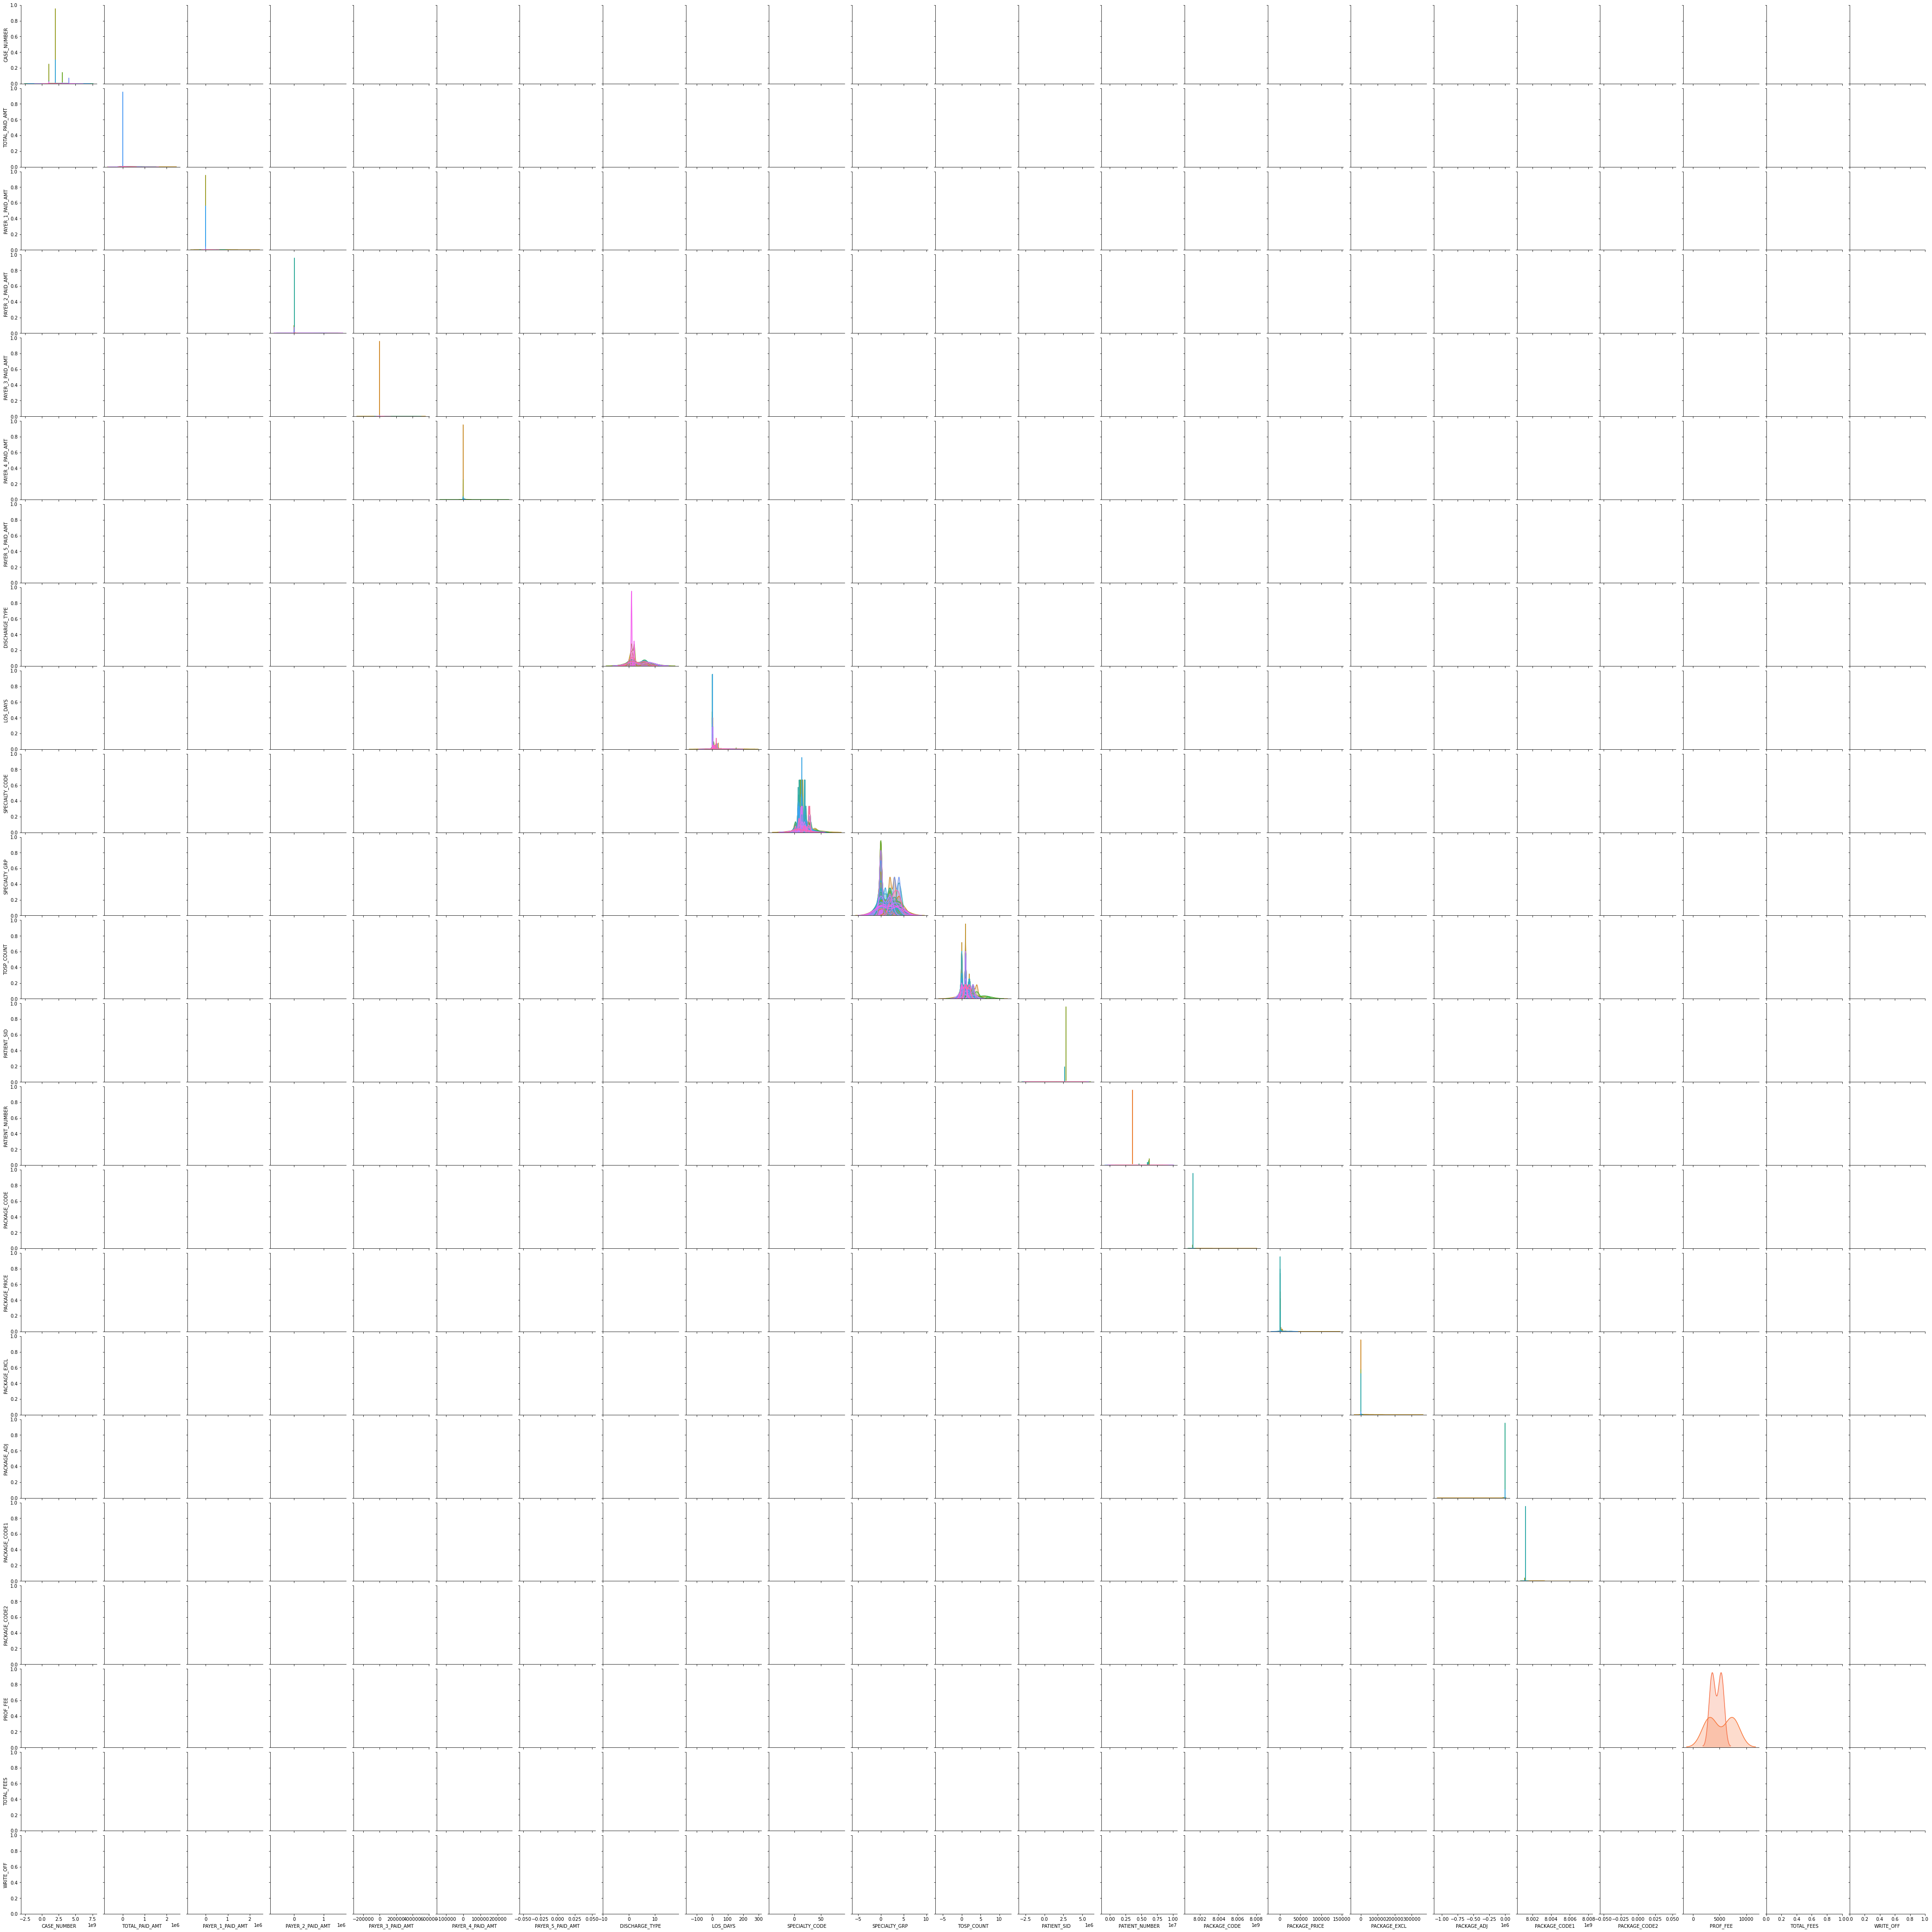

In [14]:
sns.pairplot(data=df1, vars=df.select_dtypes(include=np.number).columns, hue='WRITE_OFF')
plt.plot()

In [15]:
print(df.columns)
print(df.select_dtypes(include=np.float).columns)
print(df.select_dtypes(include=np.int64).columns)
print(df.select_dtypes(include=np.object).columns)

Index(['INSTITUTION', 'CASE_NUMBER', 'TOTAL_PAID_AMT', 'PAYER_CODE_1',
       'PAYER_NAME_1', 'PAYER_1_PAID_AMT', 'PAYER_CODE_2', 'PAYER_NAME_2',
       'PAYER_2_PAID_AMT', 'PAYER_CODE_3', 'PAYER_NAME_3', 'PAYER_3_PAID_AMT',
       'PAYER_CODE_4', 'PAYER_NAME_4', 'PAYER_4_PAID_AMT', 'PAYER_CODE_5',
       'PAYER_NAME_5', 'PAYER_5_PAID_AMT', 'CASE_TYPE', 'BED_TYPE',
       'REFERRAL_TYPE', 'TREATMENT_CATEGORY', 'ADMISSION_DTE',
       'ADMISSION_TYPE', 'DISCHARGE_DTE', 'DISCHARGE_TYPE',
       'DISCHARGE_TYPE_DESC', 'LOS_DAYS', 'DOCTOR_CODE', 'DOCTOR_NAME',
       'SPECIALTY_CODE', 'SPECIALTY_DESC', 'SPECIALTY_GRP', 'TOSP_COUNT',
       'TOSP_STRING', 'TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE3', 'TOSP_CODE4',
       'TOSP_DESC1', 'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4', 'NATIONALITY',
       'RESID_CTY', 'RESID_POSTALCODE', 'DOB', 'NONRESID_FLAG', 'PATIENT_SID',
       'PATIENT_NUMBER', 'GENDER', 'DECEASED_FLAG', 'MARITAL_STATUS',
       'RELIGION', 'LANGUAGE', 'VIP_FLAG', 'RACE', 'DRG_CO

In [16]:
df = df.astype({'SPECIALTY_CODE': 'object', 'SPECIALTY_GRP': 'object', 'PACKAGE_CODE': 'object', 'PACKAGE_CODE1': 'object', 'PACKAGE_CODE2': 'object'})
print(df.select_dtypes(include=np.float).columns)

Index(['TOTAL_PAID_AMT', 'PAYER_1_PAID_AMT', 'PAYER_2_PAID_AMT',
       'PAYER_3_PAID_AMT', 'PAYER_4_PAID_AMT', 'PAYER_5_PAID_AMT',
       'PACKAGE_PRICE', 'PACKAGE_EXCL', 'PACKAGE_ADJ', 'PROF_FEE',
       'TOTAL_FEES', 'WRITE_OFF'],
      dtype='object')


In [17]:
# check 'PAYER_CODE_1' vs 'PAYER_NAME_1', 'PAYER_CODE_2' vs 'PAYER_NAME_2', 
# 'PAYER_CODE_3' vs 'PAYER_NAME_3', 'PAYER_CODE_4' vs 'PAYER_NAME_4',
# 'PAYER_CODE_5' vs 'PAYER_NAME_5'
print('PAYER_CODE_1 vs PAYER_NAME_1: ',
      df.groupby(by=['PAYER_CODE_1'])['PAYER_NAME_1'].nunique().max())
print('PAYER_CODE_2 vs PAYER_NAME_2: ',
      df.groupby(by=['PAYER_CODE_2'])['PAYER_NAME_2'].nunique().max())
print('PAYER_CODE_3 vs PAYER_NAME_3: ',
      df.groupby(by=['PAYER_CODE_3'])['PAYER_NAME_3'].nunique().max())
print('PAYER_CODE_4 vs PAYER_NAME_4: ',
      df.groupby(by=['PAYER_CODE_4'])['PAYER_NAME_4'].nunique().max())
print('PAYER_CODE_5 vs PAYER_NAME_5: ',
      df.groupby(by=['PAYER_CODE_5'])['PAYER_NAME_5'].nunique().max())

# check 'SPECIALTY_CODE' vs 'SPECIALTY_DESC' vs 'SPECIALTY_GRP'
print('SPECIALTY_CODE vs SPECIALTY_DESC: ',
      df.groupby(by=['SPECIALTY_CODE'])['SPECIALTY_DESC'].nunique().max())
print('SPECIALTY_DESC vs SPECIALTY_GRP: ',
      df.groupby(by=['SPECIALTY_DESC'])['SPECIALTY_GRP'].nunique().max())
print('SPECIALTY_CODE vs SPECIALTY_GRP: ',
      df.groupby(by=['SPECIALTY_CODE'])['SPECIALTY_GRP'].nunique().max())

# check 'DISCHARGE_TYPE' vs 'DISCHARGE_TYPE_DESC'
print('DISCHARGE_TYPE vs DISCHARGE_TYPE_DESC: ',
      df.groupby(by=['DISCHARGE_TYPE'])['DISCHARGE_TYPE_DESC'].nunique().max())

# check 'DOCTOR_CODE' vs 'DOCTOR_NAME'
print('DOCTOR_CODE vs DOCTOR_NAME: ',
      df.groupby(by=['DOCTOR_CODE'])['DOCTOR_NAME'].nunique().max())

# check 'TOSP_DESC1', 'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4' vs 'TOSP_STRING'
# check 'TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE3', 'TOSP_CODE4' vs 'TOSP_STRING'
# check 'TOSP_CODE1' vs 'TOSP_DESC1', 'TOSP_CODE2' vs 'TOSP_DESC2', 'TOSP_CODE3' vs 'TOSP_DESC3', 'TOSP_CODE4' vs 'TOSP_DESC4'
print('TOSP_DESC1, TOSP_DESC2, TOSP_DESC3, TOSP_DESC4 vs TOSP_STRING: ',
      df.groupby(by=['TOSP_DESC1', 'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4'])['TOSP_STRING'].nunique().max())
print('TOSP_CODE1, TOSP_CODE2, TOSP_CODE3, TOSP_CODE4 vs TOSP_STRING: ',
      df.groupby(by=['TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE4'])['TOSP_STRING'].nunique().max())
print('TOSP_CODE1 vs TOSP_DESC1: ',
      df.groupby(by=['TOSP_CODE1'])['TOSP_DESC1'].nunique().max())
print('TOSP_CODE2 vs TOSP_DESC2: ',
      df.groupby(by=['TOSP_CODE2'])['TOSP_DESC2'].nunique().max())
print('TOSP_CODE3 vs TOSP_DESC3: ',
      df.groupby(by=['TOSP_CODE3'])['TOSP_DESC3'].nunique().max())
print('TOSP_CODE4 vs TOSP_DESC4: ',
      df.groupby(by=['TOSP_CODE4'])['TOSP_DESC4'].nunique().max())

# check 'PATIENT_SID' vs 'PATIENT_NUMBER'
print('PATIENT_SID vs PATIENT_NUMBER: ',
      df.groupby(by=['PATIENT_SID'])['PATIENT_NUMBER'].nunique().max())

# check 'DRG_CODE' vs'DRG_DESC'
print('DRG_CODE vs DRG_DESC: ',
      df.groupby(by=['DRG_CODE'])['DRG_DESC'].nunique().max())

# check 'PAYER_CODE1_V' vs 'PAYER_NAME1_V', 'PAYER_CODE2_V' vs 'PAYER_NAME2_V',
# 'PAYER_CODE3_V' vs 'PAYER_NAME3_V', 'PAYER_CODE4_V' vs 'PAYER_NAME4_V'
print('PAYER_CODE1_V vs PAYER_NAME1_V: ',
      df.groupby(by=['PAYER_CODE1_V'])['PAYER_NAME1_V'].nunique().max())
print('PAYER_CODE2_V vs PAYER_NAME2_V: ',
      df.groupby(by=['PAYER_CODE2_V'])['PAYER_NAME2_V'].nunique().max())
print('PAYER_CODE3_V vs PAYER_NAME3_V: ',
      df.groupby(by=['PAYER_CODE3_V'])['PAYER_NAME3_V'].nunique().max())
print('PAYER_CODE4_V vs PAYER_NAME4_V: ',
      df.groupby(by=['PAYER_CODE4_V'])['PAYER_NAME4_V'].nunique().max())

# check 'PACKAGE_CODE' vs 'PACKAGE_DESC'
print('PACKAGE_CODE vs PACKAGE_DESC: ',
      df.groupby(by=['PACKAGE_CODE'])['PACKAGE_DESC'].nunique().max())

# check  'PACKAGE_CODE1', 'PACKAGE_CODE2' vs 'PACKAGE_CODE'
print('PACKAGE_CODE1, PACKAGE_CODE2 vs PACKAGE_CODE: ',
      df.groupby(by=['PACKAGE_CODE1', 'PACKAGE_CODE2'])['PACKAGE_CODE'].nunique().max())

# check 'PACKAGE_CODE1' vs 'PACKAGE_DESC1', 'PACKAGE_CODE2' vs 'PACKAGE_DESC2'
print('PACKAGE_CODE1 vs PACKAGE_DESC1: ',
      df.groupby(by=['PACKAGE_CODE1'])['PACKAGE_DESC1'].nunique().max())
print('PACKAGE_CODE2 vs PACKAGE_DESC2: ',
      df.groupby(by=['PACKAGE_CODE2'])['PACKAGE_DESC2'].nunique().max())

# check 'ICD_CODE1', 'ICD_CODE2', 'ICD_CODE3' vs 'ICDCODE_STRING'
print('ICD_CODE1, ICD_CODE2, ICD_CODE3 vs ICDCODE_STRING: ',
      df.groupby(by=['ICD_CODE1', 'ICD_CODE2', 'ICD_CODE3'])['ICDCODE_STRING'].nunique().max())

PAYER_CODE_1 vs PAYER_NAME_1:  1
PAYER_CODE_2 vs PAYER_NAME_2:  1
PAYER_CODE_3 vs PAYER_NAME_3:  1
PAYER_CODE_4 vs PAYER_NAME_4:  1
PAYER_CODE_5 vs PAYER_NAME_5:  1
SPECIALTY_CODE vs SPECIALTY_DESC:  1
SPECIALTY_DESC vs SPECIALTY_GRP:  5
SPECIALTY_CODE vs SPECIALTY_GRP:  5
DISCHARGE_TYPE vs DISCHARGE_TYPE_DESC:  1
DOCTOR_CODE vs DOCTOR_NAME:  1
TOSP_DESC1, TOSP_DESC2, TOSP_DESC3, TOSP_DESC4 vs TOSP_STRING:  11
TOSP_CODE1, TOSP_CODE2, TOSP_CODE3, TOSP_CODE4 vs TOSP_STRING:  9
TOSP_CODE1 vs TOSP_DESC1:  1
TOSP_CODE2 vs TOSP_DESC2:  1
TOSP_CODE3 vs TOSP_DESC3:  1
TOSP_CODE4 vs TOSP_DESC4:  1
PATIENT_SID vs PATIENT_NUMBER:  1
DRG_CODE vs DRG_DESC:  2
PAYER_CODE1_V vs PAYER_NAME1_V:  1
PAYER_CODE2_V vs PAYER_NAME2_V:  1
PAYER_CODE3_V vs PAYER_NAME3_V:  1
PAYER_CODE4_V vs PAYER_NAME4_V:  1
PACKAGE_CODE vs PACKAGE_DESC:  2
PACKAGE_CODE1, PACKAGE_CODE2 vs PACKAGE_CODE:  2
PACKAGE_CODE1 vs PACKAGE_DESC1:  2
PACKAGE_CODE2 vs PACKAGE_DESC2:  1
ICD_CODE1, ICD_CODE2, ICD_CODE3 vs ICDCODE_STRING:  1

In [18]:
df_check = df.groupby(by=['TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE4'])['TOSP_STRING'].unique()
print(df_check.index[0], df_check[0], '\n')

print(df[['PATIENT_SID', 'PATIENT_NUMBER']].head(), '\n')

print('Check DRG_CODE vs DRG_DESC 2 values:')
df_check1 = df.groupby(by=['DRG_CODE'])['DRG_DESC'].unique()
print(df_check1[df_check1.map(len) > 1], '\n')

print('Check PACKAGE_CODE vs PACKAGE_DESC 2 values:')
df_check2 = df.groupby(by=['PACKAGE_CODE'])['PACKAGE_DESC'].unique()
df_check2_non_unique = df_check2[df_check2.map(len) > 1]
for row in df_check2_non_unique:
    print(row)
print('\n')

pd.options.display.float_format = '{:.0f}'.format
print('Check PACKAGE_CODE1, PACKAGE_CODE2 vs PACKAGE_CODE 2 values:')
df_check3 = df.groupby(by=['PACKAGE_CODE1', 'PACKAGE_CODE2'])['PACKAGE_CODE'].unique()
print(df_check3[df_check3.map(len) > 1], '\n')

print('Check PACKAGE_CODE1 vs PACKAGE_DESC1 2 values:')
df_check4 = df.groupby(by=['PACKAGE_CODE1'])['PACKAGE_DESC1'].unique()
df_check4_non_unique = df_check4[df_check4.map(len) > 1]
for row in df_check4_non_unique:
    print(row)
print('\n')

('SA701B', 'SA704B', 'SI805C') ['SA701B ; SA704B ; SI700U ; SI805C'] 

   PATIENT_SID  PATIENT_NUMBER
0      1759191         5131029
1      2014024         5389489
2      1053670         4128742
3      1033331         4106106
4      2218131         5591095 

Check DRG_CODE vs DRG_DESC 2 values:
DRG_CODE
960Z    [UNGROUPABLE., UNGROUPABLE]
Name: DRG_DESC, dtype: object 

Check PACKAGE_CODE vs PACKAGE_DESC 2 values:
['SG_ROBOTIC PROSTATECTOMY_LOS3_CLASS A'
 'SG_ROBOTIC PROSTATECTOMY(3A)LOS3_CLASS A']
['SG_CATARACT_UNILATERAL_BDL_DS' 'SG_CATARACT_UNILATERAL_PAP_DS']
['TC_LIVER TRANSPLANT (REC)_LOS14(ICU2)_SG'
 'TC_LIVER TRANSPLANT(REC)_LOS14(ICU2)_SGL']


Check PACKAGE_CODE1, PACKAGE_CODE2 vs PACKAGE_CODE 2 values:
PACKAGE_CODE1  PACKAGE_CODE2
8001010201     8003020001       [8001010201.0, 8003020001.0]
Name: PACKAGE_CODE, dtype: object 

Check PACKAGE_CODE1 vs PACKAGE_DESC1 2 values:
['SG_ROBOTIC PROSTATECTOMY_LOS3_CLASS A'
 'SG_ROBOTIC PROSTATECTOMY(3A)LOS3_CLASS A']
['SG_CATARACT_UNILA

       DISCHARGE_DTE ADMISSION_DTE  len_stay  LOS_DAYS
0         2018-05-04    2018-05-01         3         3
1         2018-04-24    2018-04-24         0         0
2         2018-04-12    2018-04-11         1         1
3         2017-01-27    2017-01-26         1         1
4         2019-09-26    2019-09-26         0         0
...              ...           ...       ...       ...
381206    2020-01-03    2019-12-31         3         3
381207    2020-01-04    2019-12-31         4         4
381208    2020-01-06    2019-12-31         6         6
381209    2020-01-01    2019-12-31         1         1
381210    2020-01-01    2019-12-31         1         1

[381211 rows x 4 columns]


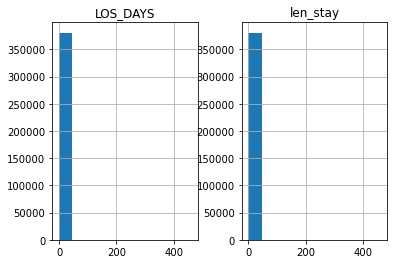

Days diff =  0


In [19]:
df['len_stay'] = (df['DISCHARGE_DTE']-df['ADMISSION_DTE']).dt.days
print(df[['DISCHARGE_DTE', 'ADMISSION_DTE','len_stay', 'LOS_DAYS']])
df[['LOS_DAYS', 'len_stay']].hist()
plt.show()
print('Days diff = ', (df['len_stay'] - df['LOS_DAYS']).sum())
df.drop('len_stay', axis=1, inplace=True)

In [20]:
print(df.groupby(by='RESID_CTY')['RESID_POSTALCODE'].nunique())

RESID_CTY
Angola                 1
Anguilla               1
Antigua/Barbuda        1
Argentina              1
Armenia                1
Australia             17
Austria                1
Bahrain                1
Bangladesh             8
Barbados               1
Belgium                1
Bermuda                1
Bhutan                 1
Botswana               1
Brazil                 1
Brunei Daruss.         5
Bulgaria               1
Cambodia               8
Cameroon               1
Canada                 1
Chile                  1
China                 15
Colombia               1
Croatia                1
Cyprus                 2
Czech Republic         1
Denmark                3
East Timor             1
Ecuador                1
Egypt                  1
El Salvador            1
Estonia                1
Ethiopia               1
Fiji                   1
Finland                1
France                 2
Germany                7
Greece                 1
Guam                   1
Guinea         

In [21]:
# break up data into hospital 

# drop duplicate CASE_NUMBER
# set CASE_NUMBER as index
# drop columnns
drop_cols = ['PAYER_NAME_1', 'PAYER_NAME_2', 'PAYER_NAME_3', 'PAYER_NAME_4', 'PAYER_NAME_5',
             'DISCHARGE_DTE', 'DISCHARGE_TYPE_DESC',
             'DOCTOR_NAME', 'SPECIALTY_DESC',
             'TOSP_STRING', 'TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE4', 'TOSP_DESC1', 'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4', # to verify
             'RESID_CTY', 'RESID_POSTALCODE', # convert to latitude longitude
             'PATIENT_SID', 'PATIENT_NUMBER', 'DRG_DESC',
             'PAYER_NAME1_V', 'PAYER_NAME2_V', 'PAYER_NAME3_V', 'PAYER_NAME4_V',
             'PACKAGE_CODE', 'PACKAGE_DESC', 'PACKAGE_DESC1', 'PACKAGE_DESC2', 'ICDCODE_STRING']

### Sampling

In [22]:
# Get random sample
sample_frac = 0.1
np.random.seed(0)
sample_size = int(round(abs(sample_frac * df1.shape[0])))
print(sample_size)
sample_indices = np.random.choice(df1.shape[0], size=sample_size, replace=False)
print(len(sample_indices))
df1_sample = df1.iloc[sample_indices]
print(df1_sample.shape)

38121
38121
(38121, 63)


In [23]:
import random
import sys
from statistics import variance, mean, stdev

def get_best_sample(df, sample_frac=0.1):
    rand_tstats = {}
    rand_f_test = {}
    sample_size = int(round(abs(sample_frac * df.shape[0])))
    random.seed(0)
    rand_list = random.sample(range(2**32 - 1), 1000)
    for rand in rand_list:
        np.random.seed(rand)
        sample_indices = np.random.choice(df.shape[0], size=sample_size, replace=False)
        df_sample = df.iloc[sample_indices]
        tstats = []
        f_tests=[]
        for col in df.columns:
            var_df = df[col].std()**2
            var_df_sample = df_sample[col].std()**2
            
            if (var_df != 0) or (var_df_sample != 0):
                tstats.append(abs((df[col].mean() - df_sample[col].mean()) / ((var_df / len(df[col])) + (var_df_sample / len(df_sample[col])))**0.5))
            else:
                tstats.append(0.0)

            if var_df_sample != 0:
                f_test = var_df / var_df_sample
            else:
                f_test = 1.0    
            f_tests.append(abs(1-f_test))

        max_tstats = max(tstats)
        max_f_test = max(f_tests)
        #print(rand, max_tstats, max_f_test)
        rand_tstats[rand] = max_tstats
        rand_f_test[rand] = max_f_test

    #print(min(rand_tstats, key=rand_tstats.get))
    #print(min(rand_f_test, key=rand_f_test.get))

    mean_tstats = mean(rand_tstats.values())
    std_tstats = stdev(rand_tstats.values())
    #print(mean_tstats, var_tstats)
    mean_f_test = mean(rand_f_test.values())
    std_f_test = stdev(rand_f_test.values())
    #print(mean_f_test, var_f_test)
    #std_rand_tstats = {key : abs(value - mean_tstats) / std_tstats for (key, value) in rand_tstats.items()}
    #std_rand_f_test = {key : abs(value - mean_f_test) / std_f_test for (key, value) in rand_f_test.items()}
    #std_rand_tstats_f_test = {key : ((value + std_rand_f_test[key]) / 2) for (key, value) in std_rand_tstats.items()}
    #std_rand_tstats_f_test_ms = {key : ((value**2 + std_rand_f_test[key]**2) / 2)**0.5 for (key, value) in std_rand_tstats.items()}
    std_rand_tstats_f_test_ms = {key : 
                                 (((abs(value - mean_tstats) / std_tstats) ** 2 
                                   + (abs(std_rand_f_test[key] - mean_f_test) / std_f_test) ** 2) / 2) ** 0.5 
                                 for (key, value) in std_rand_tstats.items()}
    #min_key = min(std_rand_tstats, key=std_rand_tstats.get)
    #print(min_key, std_rand_tstats[min_key], std_rand_f_test[min_key])
    #min_key = min(std_rand_f_test, key=std_rand_f_test.get)
    #print(min_key, std_rand_tstats[min_key], std_rand_f_test[min_key])
    #min_key = min(std_rand_tstats_f_test, key=std_rand_tstats_f_test.get)
    #print(min_key, std_rand_tstats[min_key], std_rand_f_test[min_key], std_rand_tstats_f_test[min_key])
    min_key = min(std_rand_tstats_f_test_ms, key=std_rand_tstats_f_test_ms.get)
    #print(min_key, std_rand_tstats[min_key], std_rand_f_test[min_key], std_rand_tstats_f_test[min_key], std_rand_tstats_f_test_ms[min_key])
    print(min_key, std_rand_tstats_f_test_ms[min_key])
    
    np.random.seed(min_key)
    sample_indices = np.random.choice(df.shape[0], size=sample_size, replace=False)
    return df.iloc[sample_indices]

df_sample1 = get_best_sample(df1, sample_frac=0.1)
print(df_sample1.shape)

NameError: name 'std_rand_tstats' is not defined

In [ ]:
df_sample1 = get_best_sample(df1, sample_frac=0.1)
print(df_sample1.shape)

### Feature Engineering

In [24]:
# Aggregate 'Admission_Age' using 'ADMISSION_DTE', 'DOB'
print(df['DOB'].head())
df['Admission_Age'] = df['ADMISSION_DTE'].dt.year-df['DOB'].dt.year
print(df[['ADMISSION_DTE', 'DOB','Admission_Age']])

0   1980-12-25
1   1951-10-26
2   1948-06-06
3   1980-01-23
4   1972-05-25
Name: DOB, dtype: datetime64[ns]
       ADMISSION_DTE        DOB  Admission_Age
0         2018-05-01 1980-12-25             38
1         2018-04-24 1951-10-26             67
2         2018-04-11 1948-06-06             70
3         2017-01-26 1980-01-23             37
4         2019-09-26 1972-05-25             47
...              ...        ...            ...
381206    2019-12-31 1964-10-29             55
381207    2019-12-31 1982-07-28             37
381208    2019-12-31 1937-07-16             82
381209    2019-12-31 1964-06-13             55
381210    2019-12-31 2015-12-23              4

[381211 rows x 3 columns]


In [25]:
# drop columnns
drop_cols2 = ['ADMISSION_DTE', 'DOB']

In [67]:
geocode_headers = ['country_code', 'postal_code', 'place_name', 'state_name1', 'state_code1',
                   'state_name2', 'state_code2', 'state_name3', 'state_code3',
                   'latitude', 'longitude', 'accuracy']
df_SG = pd.read_csv('./data/geocode/SG.txt', sep='\t', header=None, names=geocode_headers, dtype=object, encoding='utf_8')
print(df_SG.columns)
print(df_SG.head())
print(df_SG.tail())
print(df_SG.info())

Index(['country_code', 'postal_code', 'place_name', 'state_name1',
       'state_code1', 'state_name2', 'state_code2', 'state_name3',
       'state_code3', 'latitude', 'longitude', 'accuracy'],
      dtype='object')
  country_code postal_code            place_name state_name1 state_code1  \
0           SG      018906     Straits Boulevard         NaN         NaN   
1           SG      018907     Straits Boulevard         NaN         NaN   
2           SG      018910  Marina Gardens Drive         NaN         NaN   
3           SG      018915     Central Boulevard         NaN         NaN   
4           SG      018916     Central Boulevard         NaN         NaN   

  state_name2 state_code2 state_name3 state_code3 latitude longitude accuracy  
0         NaN         NaN         NaN         NaN   1.2758  103.8496      NaN  
1         NaN         NaN         NaN         NaN   1.2749  103.8517      NaN  
2         NaN         NaN         NaN         NaN   1.2796   103.869      NaN  
3      

In [66]:
df_SG['latitude'].astype('float64')

0        1 
1        1 
2        1 
3        1 
4        1 
         ..
121149   1 
121150   1 
121151   1 
121152   1 
121153   1 
Name: latitude, Length: 121154, dtype: float64

In [70]:
df_SG['latitude']

0         1.2758
1         1.2749
2         1.2796
3         1.2737
4         1.2798
           ...  
121149    1.3523
121150    1.4336
121151    1.2772
121152    1.3753
121153     1.355
Name: latitude, Length: 121154, dtype: object

In [69]:
test_postal = '570449'
print(df_SG.loc[df_SG['postal_code'] == test_postal])

      country_code postal_code       place_name state_name1 state_code1  \
82643           SG      570449  Sin Ming Avenue         NaN         NaN   

      state_name2 state_code2 state_name3 state_code3 latitude longitude  \
82643         NaN         NaN         NaN         NaN   1.3581  103.8308   

      accuracy  
82643      NaN  


### Preprocessing

### Training

### Validation